In [19]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa 
from pydub import AudioSegment
import librosa.display
from scipy.signal import butter, lfilter
import scipy
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, LSTM, MaxPooling2D
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils
from icecream import ic
import pandas as pd
import glob
%matplotlib inline

In [2]:
filename = "UrbanSound8K/audio/fold1/7061-6-0-0.wav"
# plt.figure(figsize=(14,5))
ipd.Audio(filename, rate=22050)

ValueError: could not convert string to float: 'UrbanSound8K/audio/fold1/7061-6-0-0.wav'

In [3]:
data, sample_rate = librosa.load(filename, sr=44100, mono=True)
sample_rate = 44100
plt.figure(figsize=(14, 5))
plt.subplot(3, 1, 1)
librosa.display.waveshow(data, sr=sample_rate, color='b')  # Set the color explicitly

plt.title('Waveform of Snoring Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

C:\Users\luisb\AppData\Local\Temp\ipykernel_12604\1621720105.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  data, sample_rate = librosa.load(filename, sr=44100, mono=True)
c:\Users\luisb\.pyenv\pyenv-win\versions\3.11.6\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: [Errno 2] No such file or directory: 'UrbanSound8K/audio/fold1/7061-6-0-0.wav'

Text(22.472222222222214, 0.5, 'Amplitude')

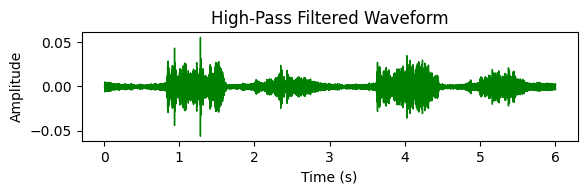

In [4]:
# Apply high-pass filter
cutoff_high = 100  # Adjust the cutoff frequency as needed
high_pass_filtered_signal = scipy.signal.butter(4, cutoff_high / (0.5 * sample_rate), btype='high', analog=False)
filtered_signal_high = scipy.signal.lfilter(*high_pass_filtered_signal, data)

# Plot the high-pass filtered waveform
plt.subplot(3, 1, 2)
librosa.display.waveshow(filtered_signal_high, sr=sample_rate, color='g')
plt.title('High-Pass Filtered Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

In [5]:
print("Playing High-Pass Filtered Audio:")
ipd.Audio(filtered_signal_high, rate=sample_rate)

Playing High-Pass Filtered Audio:


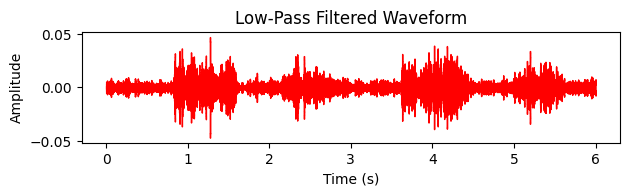

In [7]:
# Apply low-pass filter
cutoff_low = 1500  # Adjust the cutoff frequency as needed
low_pass_filtered_signal = scipy.signal.butter(4, cutoff_low / (0.5 * sample_rate), btype='low', analog=False)
filtered_signal_low = scipy.signal.lfilter(*low_pass_filtered_signal, data)

# Plot the low-pass filtered waveform
plt.subplot(3, 1, 3)
librosa.display.waveshow(filtered_signal_low, sr=sample_rate, color='r')
plt.title('Low-Pass Filtered Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Display the plots
plt.tight_layout()
plt.show()

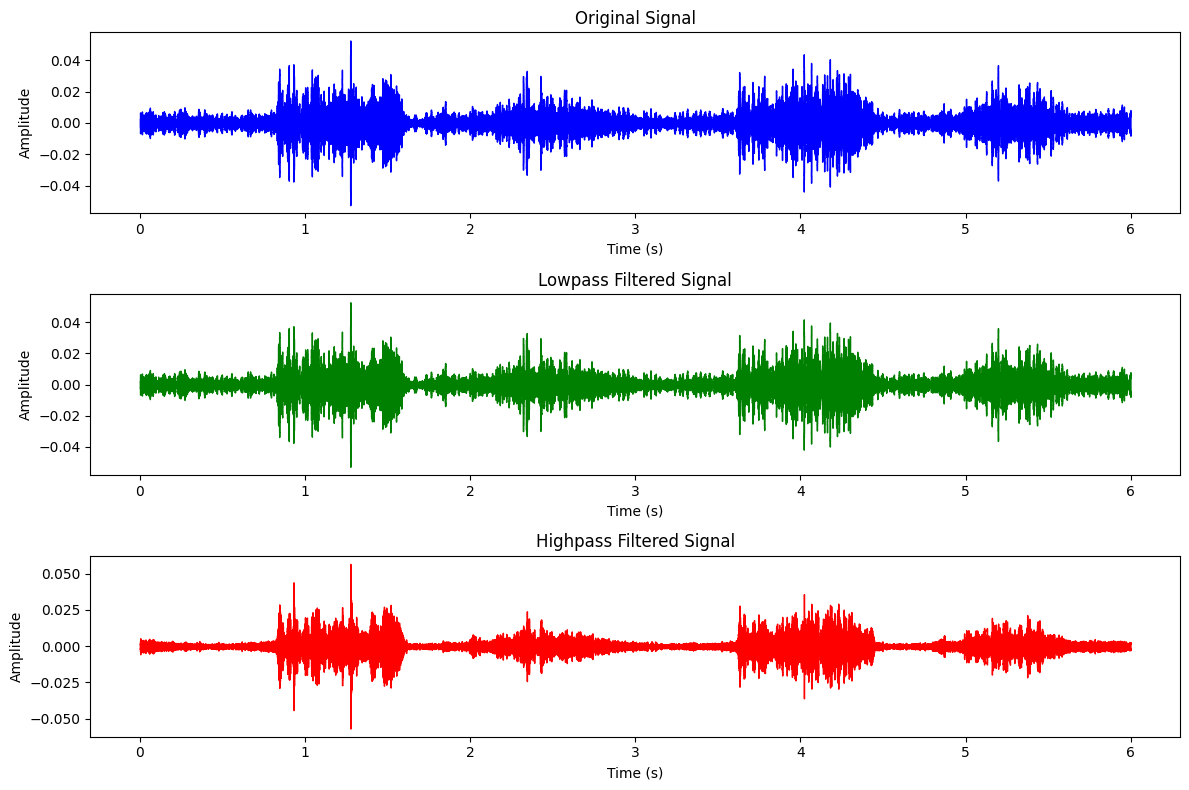

In [8]:
data, sample_rate = librosa.load(filename, sr=None, mono=True)

def butter_lowpass_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_highpass_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

# Apply low-pass filter
cutoff_lowpass = 10000  # 5 kHz
filtered_lowpass = butter_lowpass_filter(data, cutoff_lowpass, sample_rate)

# Apply high-pass filter
cutoff_highpass = 100  # 20 Hz
filtered_highpass = butter_highpass_filter(filtered_lowpass, cutoff_highpass, sample_rate)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

# Plot original signal
plt.subplot(3, 1, 1)
librosa.display.waveshow(data, sr=sample_rate, color='b')
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot low-pass filtered signal
plt.subplot(3, 1, 2)
librosa.display.waveshow(filtered_lowpass, sr=sample_rate, color='g')
plt.title('Lowpass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot high-pass filtered signal
plt.subplot(3, 1, 3)
librosa.display.waveshow(filtered_highpass, sr=sample_rate, color='r')
plt.title('Highpass Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()



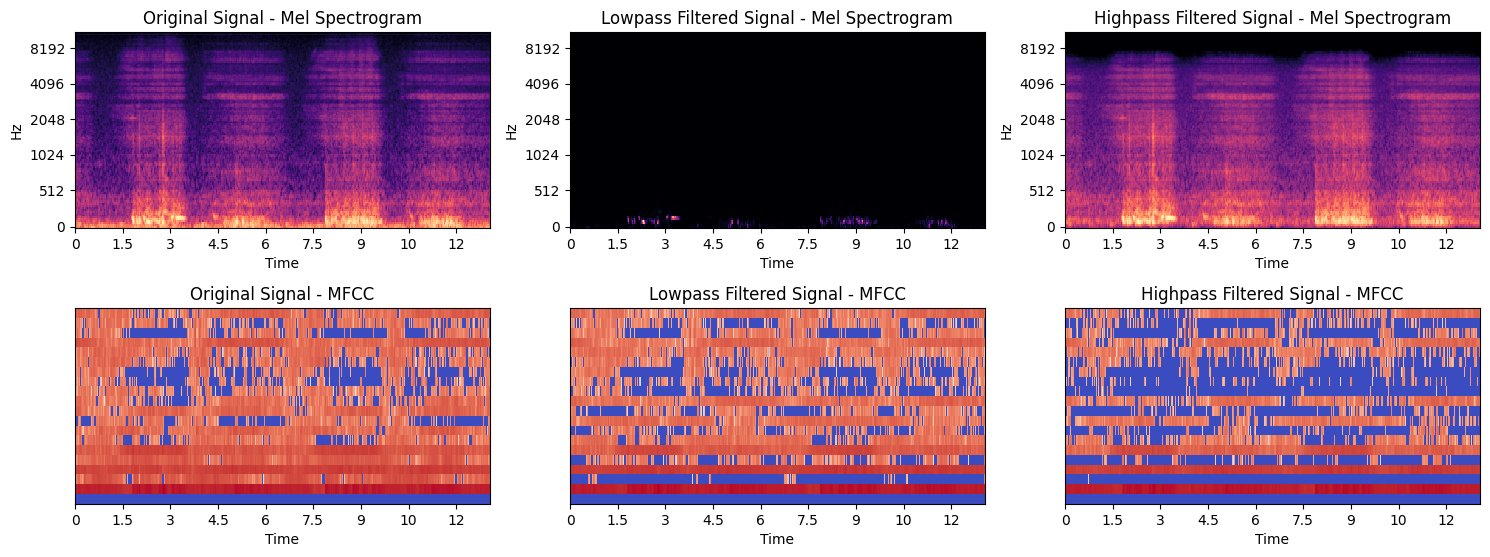

In [9]:
# Plot mel spectrograms
plt.figure(figsize=(15, 8))

plt.subplot(3, 3, 1)
librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y = data, sr=sample_rate, n_fft=2048, hop_length=512)), y_axis='mel', x_axis='time')
plt.title('Original Signal - Mel Spectrogram')

plt.subplot(3, 3, 2)
librosa.display.specshow((librosa.feature.melspectrogram(y=filtered_lowpass, sr=sample_rate, n_fft=2048, hop_length=512)), y_axis='mel', x_axis='time')
plt.title('Lowpass Filtered Signal - Mel Spectrogram')

plt.subplot(3, 3, 3)
librosa.display.specshow(librosa.power_to_db(librosa.feature.melspectrogram(y=filtered_highpass, sr=sample_rate,n_fft=2048, hop_length=512)), y_axis='mel', x_axis='time')
plt.title('Highpass Filtered Signal - Mel Spectrogram')

# Plot MFCCs
plt.subplot(3, 3, 4)
librosa.display.specshow(librosa.power_to_db(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=20)), x_axis='time')
plt.title('Original Signal - MFCC')

plt.subplot(3, 3, 5)
librosa.display.specshow(librosa.power_to_db(librosa.feature.mfcc(y=filtered_lowpass, sr=sample_rate, n_mfcc=20)), x_axis='time')
plt.title('Lowpass Filtered Signal - MFCC')

plt.subplot(3, 3, 6)
librosa.display.specshow(librosa.power_to_db(librosa.feature.mfcc(y=filtered_highpass, sr=sample_rate, n_mfcc=20)), x_axis='time')
plt.title('Highpass Filtered Signal - MFCC')

plt.tight_layout()
plt.show()

In [4]:
def preprocess(filepath, target_duration_ms, label):
    wav, sr = librosa.load(filepath, sr=44100, mono=True)
    cutoff_highpass = 20  # 20 Hz
    wav = butter_highpass_filter(wav, cutoff_highpass, sr)
    actual_duration = int((len(wav)/sr)*1000)
    if target_duration_ms < actual_duration:
        trim = round((actual_duration-target_duration_ms)*sr/1000)//2
        wav = wav[trim:-trim]
    elif target_duration_ms > actual_duration:
        padding = (target_duration_ms - actual_duration)
        noise = np.random.normal(0, 0.0005, int((padding * sr) / 1000))
        noise = butter_highpass_filter(noise, cutoff_highpass, sr)
        padding = len(noise)//2
        wav = np.concatenate((noise[:padding], wav, noise[padding:]), axis = 0)

    spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(
                    y=wav, 
                    sr=sample_rate, 
                    n_fft=1024, 
                    hop_length=512))
    spectrogram = abs(spectrogram)
    means = np.mean(spectrogram, axis=1, keepdims=True)
    stddevs = np.std(spectrogram, axis=1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    return spectrogram, label
    

In [22]:
metadata_file = "UrbanSound8K/metadata/UrbanSound8K.csv"
df = pd.read_csv(metadata_file)
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [24]:
df['relative_path'] = '/fold' + df['fold'].astype(str) + '/' + df['slice_file_name'].astype(str)
df = df[['relative_path', 'classID']]
df.head()

,relative_path,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2


In [179]:
def time_shit(wav, sr, shift_lim):
    _, sig_len = wav
    shit_amt = int(random.random()*shift_lim*sig_len)
    return (sig.roll(shift_amt), sr)

In [190]:
df = pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [194]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.countplot(df['Class'])

ModuleNotFoundError: No module named 'seaborn'

In [234]:
audio_directory = "UrbanSound8K/audio"

# Path to the metadata file
metadata_path = "UrbanSound8K/metadata/UrbanSound8K.csv"

# Load metadata
metadata = pd.read_csv(metadata_path)
# Create empty lists to store spectrograms and labels
spectrograms = []
labels = []

# Iterate over each row in the metadata file
for index, row in metadata.iterrows():
    filename = str(row['slice_file_name'])
    label = row['classID']
    fold = "fold"+str(row['fold'])
    file_path = os.path.join(audio_directory, fold, filename).replace("\\","/")


    spectrogram, label = preprocess(file_path, target_duration_ms=4000, label=label)

    spectrograms.append(spectrogram)
    labels.append(label)

In [239]:
spectrograms = np.array(spectrograms)
labels = np.array(labels)

train_X, test_X, train_Y, test_Y = train_test_split(spectrograms, labels,
                                                    test_size = 0.2, random_state = None)

In [242]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [241]:
from sklearn.model_selection import KFold
inputs = np.concatenate((train_X, test_X), axis=0)
targets = np.concatenate((train_Y, test_Y), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=10, shuffle=False)

In [251]:
input_shape = (1,128,345)

In [257]:
input_shape = (128, 345, 1)

In [265]:
acc_per_fold =[]
loss_per_fold = []
fold_no = 1
from tensorflow.keras.backend import clear_session
clear_session()

for train, test in kfold.split(inputs, targets):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="adam",
                    metrics=['accuracy'])
    
    # print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs[train], targets[train],
                batch_size=32,
                epochs=5,
                verbose=1)

    # Generate generalization metrics
    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no = fold_no + 1
    

Training for fold 1 ...


MemoryError: Unable to allocate 2.59 GiB for an array with shape (7858, 128, 345) and data type float64

In [33]:
y, sr = librosa.load(filename, sr=22050)

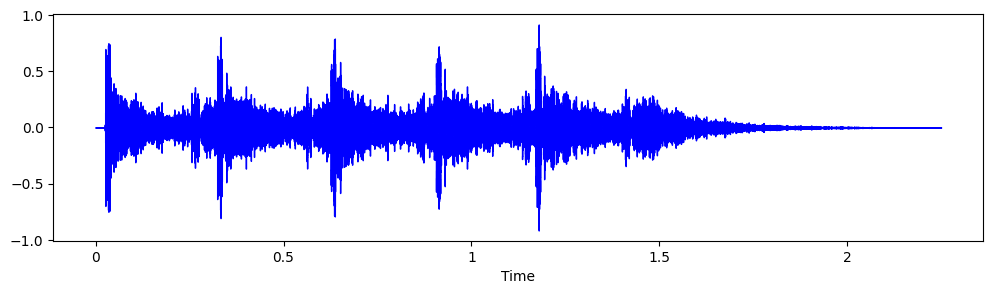

In [34]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, color='b')

In [35]:
n_fft = 2048
hop_length = 512
window_type = 'hann'

spectrogram_librosa = np.abs(librosa.stft(y, n_fft=n_fft, hop_length= hop_length,
                                          win_length = n_fft, window=window_type))**2

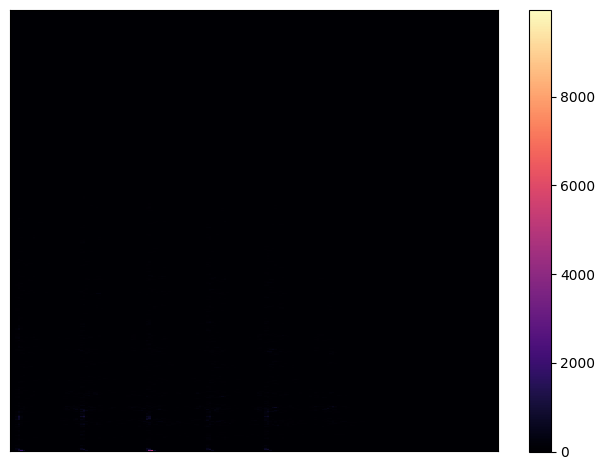

In [30]:
librosa.display.specshow(spectrogram_librosa, sr=sr, hop_length=hop_length)
plt.colorbar()
plt.tight_layout()
plt.show()

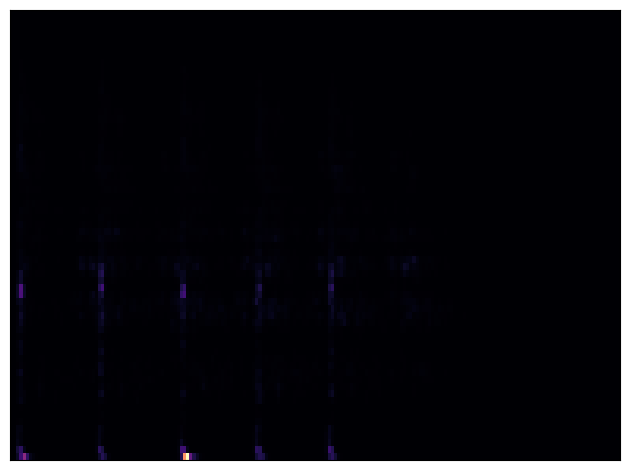

In [31]:
mel_bins = 64
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, win_length=n_fft, window=window_type, n_mels=mel_bins)
librosa.display.specshow(mel_spectrogram, sr=sr)
plt.tight_layout()
plt.show()

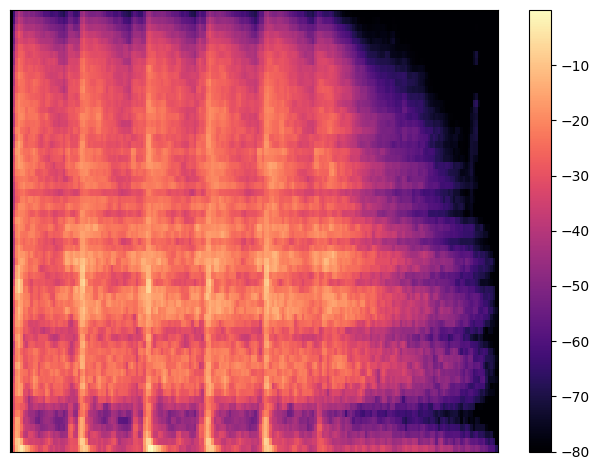

In [36]:
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
librosa.display.specshow(mel_spectrogram_db, sr=sr)
plt.colorbar()
plt.tight_layout()
plt.show()

In [38]:
normalizedy = librosa.util.normalize(y)

In [41]:
stft = librosa.core.stft(normalizedy, n_fft = 2048, hop_length=512)
mel = librosa.feature.melspectrogram(S=stft, n_mels=64)
mellog = np.log(mel + 1e-9)
melnormalized = librosa.util.normalize(mellog)

C:\Users\luisb\AppData\Local\Temp\ipykernel_20592\2841520410.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(melnormalized , sr=sr)


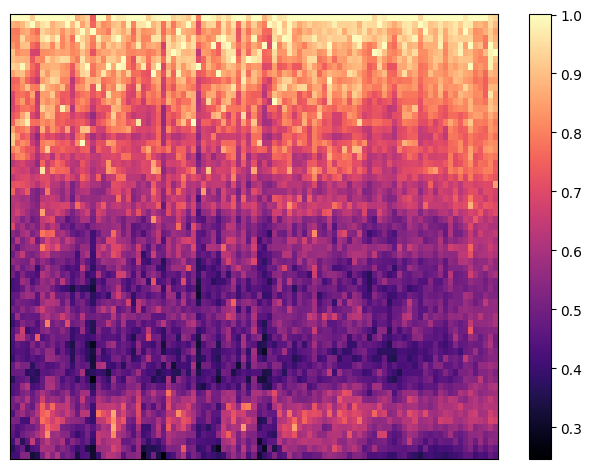

In [42]:
librosa.display.specshow(melnormalized , sr=sr)
plt.colorbar()
plt.tight_layout()
plt.show()

In [5]:
def butter_lowpass_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

def butter_highpass_filter(data, cutoff_frequency, sample_rate, order=4):
    nyquist = 0.5 * sample_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    filtered_data = lfilter(b, a, data)
    return filtered_data

In [11]:
def process_audio(filepath, target_duration_ms):
    wav, sr = librosa.load(filepath, sr=44100, mono=True)
    cutoff_highpass = 20  # 20 Hz
    wav = butter_highpass_filter(wav, cutoff_highpass, sr)
    actual_duration = int((len(wav)/sr)*1000)
    if target_duration_ms < actual_duration:
        trim = round((actual_duration-target_duration_ms)*sr/1000)//2
        wav = wav[trim:-trim]
    elif target_duration_ms > actual_duration:
        padding = (target_duration_ms - actual_duration)
        noise = np.random.normal(0, 0.0005, int((padding * sr) / 1000))
        noise = butter_highpass_filter(noise, cutoff_highpass, sr)
        padding = len(noise)//2
        wav = np.concatenate((noise[:padding], wav, noise[padding:]), axis = 0)

    spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(
                    y=wav, 
                    sr=sr, 
                    n_fft=1024, 
                    hop_length=512))
    spectrogram = abs(spectrogram)
    means = np.mean(spectrogram, axis=1, keepdims=True)
    stddevs = np.std(spectrogram, axis=1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    return spectrogram

In [9]:
def preprocess(filepath, target_duration_ms):
    wav, sr = librosa.load(filepath, sr=22050, mono=True)
    cutoff_highpass = 20  # 20 Hz
    wav = butter_highpass_filter(wav, cutoff_highpass, sr)
    actual_duration = int((len(wav)/sr)*1000)
    if target_duration_ms < actual_duration:
        trim = round((actual_duration-target_duration_ms)*sr/1000)//2
        wav = wav[trim:-trim]
    elif target_duration_ms > actual_duration:
        padding = (target_duration_ms - actual_duration)
        noise = np.random.normal(0, 0.0005, int((padding * sr) / 1000))
        noise = butter_highpass_filter(noise, cutoff_highpass, sr)
        padding = len(noise)//2
        wav = np.concatenate((noise[:padding], wav, noise[padding:]), axis = 0)

    spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(
                    y=wav, 
                    sr=sr, 
                    n_fft=1024, 
                    hop_length=512))
    spectrogram = abs(spectrogram)
    means = np.mean(spectrogram, axis=1, keepdims=True)
    stddevs = np.std(spectrogram, axis=1, keepdims=True)
    spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    return spectrogram, label

In [56]:
spectrogram = np.array(librosa.power_to_db(librosa.feature.melspectrogram(
                    y=y, 
                    sr=sr)))

In [63]:
spectrogram.max(axis=1)

array([ 24.71008   ,  19.019598  ,  13.651043  ,  14.79965   ,
        12.418199  ,   8.344281  ,   5.695085  ,   4.399718  ,
         3.5900383 ,   6.4206476 ,   6.6560307 ,   6.035464  ,
         4.931971  ,  -0.9907509 ,  -3.2544098 ,   0.43424502,
         0.7508714 ,  -2.6013196 ,  -2.9416852 ,  -3.7037373 ,
         3.8324711 ,   6.509125  ,   6.7527347 ,   8.664129  ,
         7.112549  ,   6.0822463 ,   6.78199   ,   3.5558345 ,
         3.720222  ,   6.3857403 ,   6.619113  ,   8.311996  ,
         7.579627  ,   5.12652   ,   4.271976  ,   2.9192853 ,
         4.4770756 ,   7.4212484 ,   5.050283  ,   5.24147   ,
         5.849928  ,   0.8715881 ,  -0.62189156,   2.8604462 ,
         1.9524246 ,   8.114451  ,   8.228303  ,   7.1292214 ,
         8.963131  ,   9.853671  ,   8.611262  ,   7.876125  ,
         7.787626  ,   8.661861  ,   9.570965  ,  10.96334   ,
        13.860359  ,  11.474685  ,  12.649834  ,  12.39006   ,
         8.345531  ,   9.2193365 ,   8.237655  ,   9.93

In [65]:

spectrogram_mean = spectrogram.mean(axis=1)
spectrogram_min = spectrogram.min(axis = 1)
spectrogram_max = spectrogram.max(axis=1)

In [248]:
def get_feature(file_path, target_duration_ms):
    wav, sr = librosa.load(file_path, sr=44100, mono=True)
    cutoff_highpass = 20  # 20 Hz
    wav = butter_highpass_filter(wav, cutoff_highpass, sr)
    actual_duration = int((len(wav)/sr)*1000)
    if target_duration_ms < actual_duration:
        trim = round((actual_duration-target_duration_ms)*sr/1000)//2
        wav = wav[trim:-trim]
    elif target_duration_ms > actual_duration:
        padding = (target_duration_ms - actual_duration)
        noise = np.random.normal(0, 0.0005, int((padding * sr) / 1000))
        noise = butter_highpass_filter(noise, cutoff_highpass, sr)
        padding = len(noise)//2
        wav = np.concatenate((noise[:padding], wav, noise[padding:]), axis = 0)
        
    mfcc = np.array(librosa.feature.mfcc(y=wav, sr=sr).T)


    spectrogram = librosa.power_to_db(librosa.feature.melspectrogram(
                    y=wav, 
                    sr=sr, 
                    n_fft=1024, 
                    hop_length=512).T)
    spectrogram = abs(spectrogram)
    means = np.mean(spectrogram, axis=1, keepdims=True)
    stddevs = np.std(spectrogram, axis=1, keepdims=True)
    spectrogram = ((spectrogram - means) / (stddevs + 1e-10))
    
    # means = np.mean(spectrogram, axis=1, keepdims=True)
    # stddevs = np.std(spectrogram, axis=1, keepdims=True)
    # spectrogram = (spectrogram - means) / (stddevs + 1e-10)
    # spectrogram = np.array(spectrogram)
    
    chroma = np.array(librosa.feature.chroma_stft(y=wav, sr=sr).T)

    
    tonnetz = np.array(librosa.feature.tonnetz(y=wav, sr=sr).T)

    
    feature = np.hstack([mfcc, chroma, spectrogram, tonnetz])
    return feature
    

In [12]:
directory = "UrbanSound8K/audio"
categories = ['Snoring', "Non-snoring"]
features = []
labels = []
for category in categories:
    print("Calculating features for " + str(category) + " episodes")
    for file in os.listdir(directory +"/"+category):
        file_path = directory+"/"+category+"/"+file
        
        features.append(process_audio(file_path, 6000))
        label = categories.index(category)
        labels.append(label)

Calculating features for Snoring episodes
Calculating features for Non-snoring episodes


In [13]:
features = np.array(features)
labels = np.array(labels)

In [14]:
X_train, X_rem, y_train, y_rem = train_test_split(features,labels, train_size=0.8, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, shuffle=True)

In [17]:
print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)
# print(X_test.shape), print(y_test.shape)

(10982, 128, 517)
(10982,)


(None, None)

In [230]:
timesteps = 498  # Assuming 498 timesteps per sequence
features = 1  # Assuming 1 feature per timestep

# Reshape X_train to have the shape (number of samples, timesteps, features)
X_valid_reshaped = X_valid.reshape((X_valid.shape[0], timesteps, features))

In [51]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,517, 1)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 515, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 257, 32)       0         
 D)                                                              
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 128, 32)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 126976)            0         
                                                                 
 dense (Dense)               (None, 64)                8126528   
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [231]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense
# tf.keras.backend.clear_session()
# model_LSTM = Sequential()

# # First LSTM layer (return_sequences=True is set only in the first layer)
# model_LSTM.add(LSTM(64, return_sequences=True, input_shape=(498, 1)))
# model_LSTM.add(Dropout(0.2))
# # model_LSTM.add(LSTM(64, return_sequences=True))  
# # model_LSTM.add(Dropout(0.2))
# model_LSTM.add(LSTM(64, return_sequences=False))  
# model_LSTM.add(Dropout(0.2))
# model_LSTM.add(Dense(1, activation='sigmoid'))  # Adjust the number of units based on your task

# # Compile the model
# model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Display the model summary
# model_LSTM.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 498, 64)           16896     
                                                                 
 dropout (Dropout)           (None, 498, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint('modelCNN/', save_best_only = True)
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])

In [56]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = np.expand_dims(X_train, axis=-1)
X_valid = np.expand_dims(X_valid, axis=-1)
datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to the range [0, 1]
)
train_generator = datagen.flow(X_train, y_train, batch_size=32)

model.fit(train_generator, validation_data=(X_valid, y_valid), 
          epochs=1,
          callbacks=early_stopping)

MemoryError: Unable to allocate 2.71 GiB for an array with shape (10982, 128, 517, 1) and data type float32

In [40]:
results = model.evaluate(X_test, y_test)

43/43 [==============================] - 30s 696ms/step - loss: 0.0077 - accuracy: 0.9978


In [29]:
y_train[500:1300]

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,

In [174]:
model_LSTM.save('LSTM2.keras')

In [41]:
spectrogram  = process_audio("snoring-8486.mp3",6000)

In [44]:
spectrogram = np.expand_dims(spectrogram, axis=(0, -1))

In [45]:
model.predict(spectrogram)

1/1 [==============================] - 0s 322ms/step


array([[0.00019275]], dtype=float32)